✅ Data loaded successfully!
Preprocessing data...

Class Distribution:
is_extrovert
0    0.769568
1    0.230432
Name: proportion, dtype: float64

Text cleaning complete.

Training set size: 6506 users
Test set size: 2169 users
Vocabulary size: 5000 words

✅ Model training complete!

Model Accuracy: 0.7644

--- Classification Report ---
              precision    recall  f1-score   support

   Introvert       0.87      0.81      0.84      1669
   Extrovert       0.49      0.60      0.54       500

    accuracy                           0.76      2169
   macro avg       0.68      0.71      0.69      2169
weighted avg       0.78      0.76      0.77      2169

Generating confusion matrix plot...


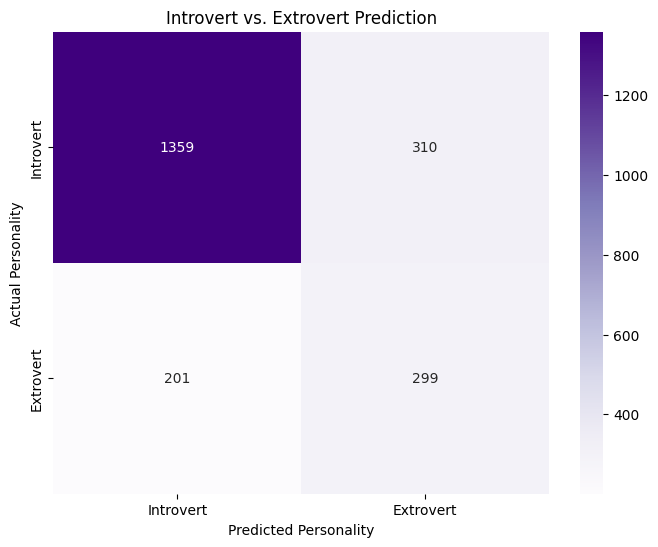

Generating ROC curve plot...


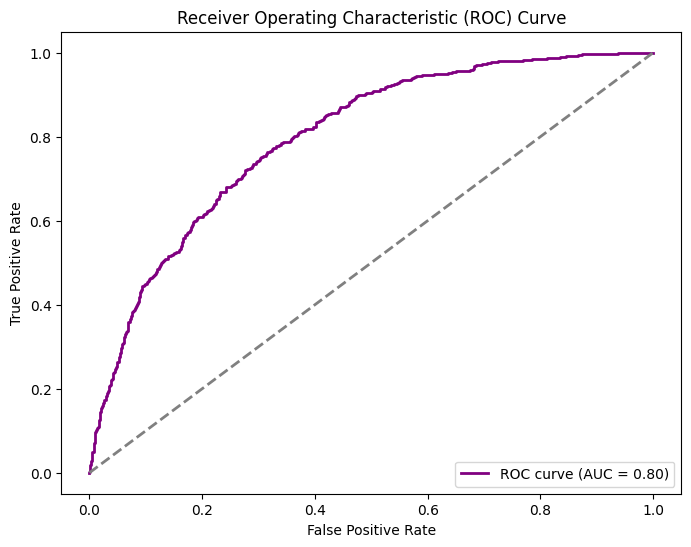

In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
)


try:
    df = pd.read_csv('/kaggle/input/mbti-type/mbti_1.csv')
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'mbti_1.csv' not found. Please download it from Kaggle.")
    exit()

print("Preprocessing data...")

df['is_extrovert'] = df['type'].apply(lambda x: 1 if x[0] == 'E' else 0)

print("\nClass Distribution:")
print(df['is_extrovert'].value_counts(normalize=True))

def clean_posts(text):
    text = re.sub(r'http[s]?://\S+', '', text)
    text = text.replace('|||', ' ')
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    return text

df['cleaned_posts'] = df['posts'].apply(clean_posts)
print("\nText cleaning complete.")

X = df['cleaned_posts']
y = df['is_extrovert']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

vectorizer = CountVectorizer(binary=True, stop_words='english', max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"\nTraining set size: {X_train_vec.shape[0]} users")
print(f"Test set size: {X_test_vec.shape[0]} users")
print(f"Vocabulary size: {X_train_vec.shape[1]} words")

model = BernoulliNB()
model.fit(X_train_vec, y_train)
print("\n✅ Model training complete!")
y_pred = model.predict(X_test_vec)
y_pred_proba = model.predict_proba(X_test_vec)[:, 1] # Probabilities for 'Extrovert'

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Introvert', 'Extrovert']))

print("Generating confusion matrix plot...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Introvert', 'Extrovert'],
            yticklabels=['Introvert', 'Extrovert'])
plt.xlabel('Predicted Personality')
plt.ylabel('Actual Personality')
plt.title('Introvert vs. Extrovert Prediction')
plt.show()

print("Generating ROC curve plot...")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()